In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-laplace-poisson)


First we define the problem on $[0,1]\times[0,2]$.

In [2]:
f = (x, y) -> -sin(3x * y - 4y) * (9y^2 + (3x - 4)^2);
g = (x, y) -> sin(3x * y - 4y);
xspan = [0, 1];
yspan = [0, 2];

Here is the finite-difference solution.

In [3]:
x, y, U = FNC.poissonfd(f, g, 40, xspan, 60, yspan);

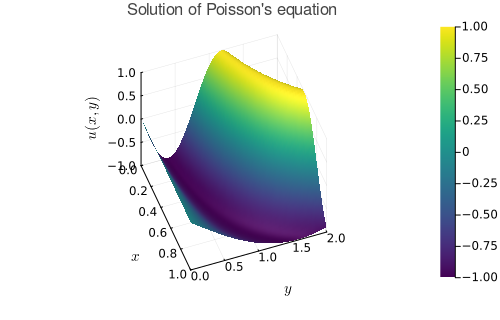

In [4]:
surface(x, y, U';
    color=:viridis,
    title="Solution of Poisson's equation",
    xaxis=(L"x"),  yaxis=(L"y"),  zaxis=(L"u(x,y)"),
    right_margin=3Plots.mm,  camera=(70, 50))

The error is a smooth function of $x$ and $y$. It must be zero on the boundary; otherwise, we have implemented boundary conditions incorrectly.

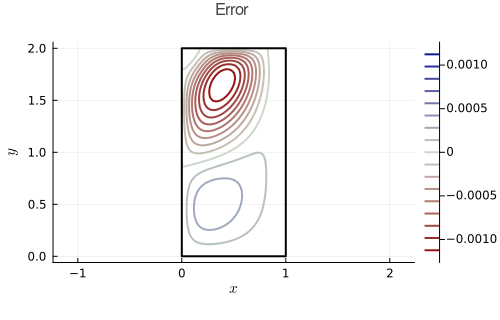

In [5]:
error = [g(x, y) for x in x, y in y] - U;
M = maximum(abs, error)
contour(x, y, error';
    levels=17, 
    clims=(-M, M), color=:redsblues, 
    colorbar=:bottom,  aspect_ratio=1,
    title="Error", 
    xaxis=(L"x"),  yaxis=(L"y"),
    right_margin=7Plots.mm)
plot!([0, 1, 1, 0, 0], [0, 0, 2, 2, 0], l=(2, :black))